Notebook for testing nn performance

In [1]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output, extract_csv_info_datasets_folder, format_data_preisach
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [2]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse

# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [3]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [4]:
# Load data for training
raw_train_data = extract_csv_info_datasets_folder("./datasets/HB_Comb.csv")
formatted_data_3_in_1_out = format_data(raw_train_data)
train_x, train_y = split_input_output(formatted_data_3_in_1_out)

# Load data for training Preisach NN
p_train_x, p_train_y = format_data_preisach(raw_train_data)
p_train_x = np.reshape(np.array(p_train_x), (len(p_train_x), 1))
p_train_y = np.reshape(np.array(p_train_y), (len(p_train_y), 1))
#print(raw_train_data)
print(p_train_x)
print(p_train_x.shape)
#print(train_x)
#print(train_y)

[[  0.        ]
 [  0.67509479]
 [  1.3526741 ]
 ...
 [-60.56545115]
 [-77.87917886]
 [-95.07675415]]
(3564, 1)


In [5]:
# Load data for testing
raw_test_data = extract_csv_info_datasets_folder("./datasets/HB1.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Load data for testing Preisach NN
p_test_x, p_test_y = format_data_preisach(raw_train_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])

## Recurrent Preisach NN

In [6]:
# Generate and train recurrent preisach network
n = 20
rpnn_model = train_and_generate_recurrent_preisach_network(p_train_x[0:3552], p_train_y[0:3552], "recurrent_preisach.model", n_epochs=n)

Epoch 1/20
111/111 [==============================] - 3s 9ms/step - loss: 1.0011 - mean_squared_error: 1.0011
Epoch 2/20
111/111 [==============================] - 1s 9ms/step - loss: 1.0017 - mean_squared_error: 1.0017
Epoch 3/20
111/111 [==============================] - 1s 9ms/step - loss: 0.9856 - mean_squared_error: 0.9856
Epoch 4/20
111/111 [==============================] - 1s 9ms/step - loss: 0.9924 - mean_squared_error: 0.9924
Epoch 5/20
111/111 [==============================] - 1s 10ms/step - loss: 0.9749 - mean_squared_error: 0.9749
Epoch 6/20
111/111 [==============================] - 1s 11ms/step - loss: 0.9732 - mean_squared_error: 0.9732
Epoch 7/20
111/111 [==============================] - 1s 11ms/step - loss: 0.9775 - mean_squared_error: 0.9775
Epoch 8/20
111/111 [==============================] - 1s 11ms/step - loss: 0.9667 - mean_squared_error: 0.9667
Epoch 9/20
111/111 [==============================] - 1s 12ms/step - loss: 0.9912 - mean_squared_error: 0.9912
Epoch

Output range of predicted loop should be bound between (-2, 2). Max should be something around 1.8
36/36 [==============================] - 0s 5ms/step


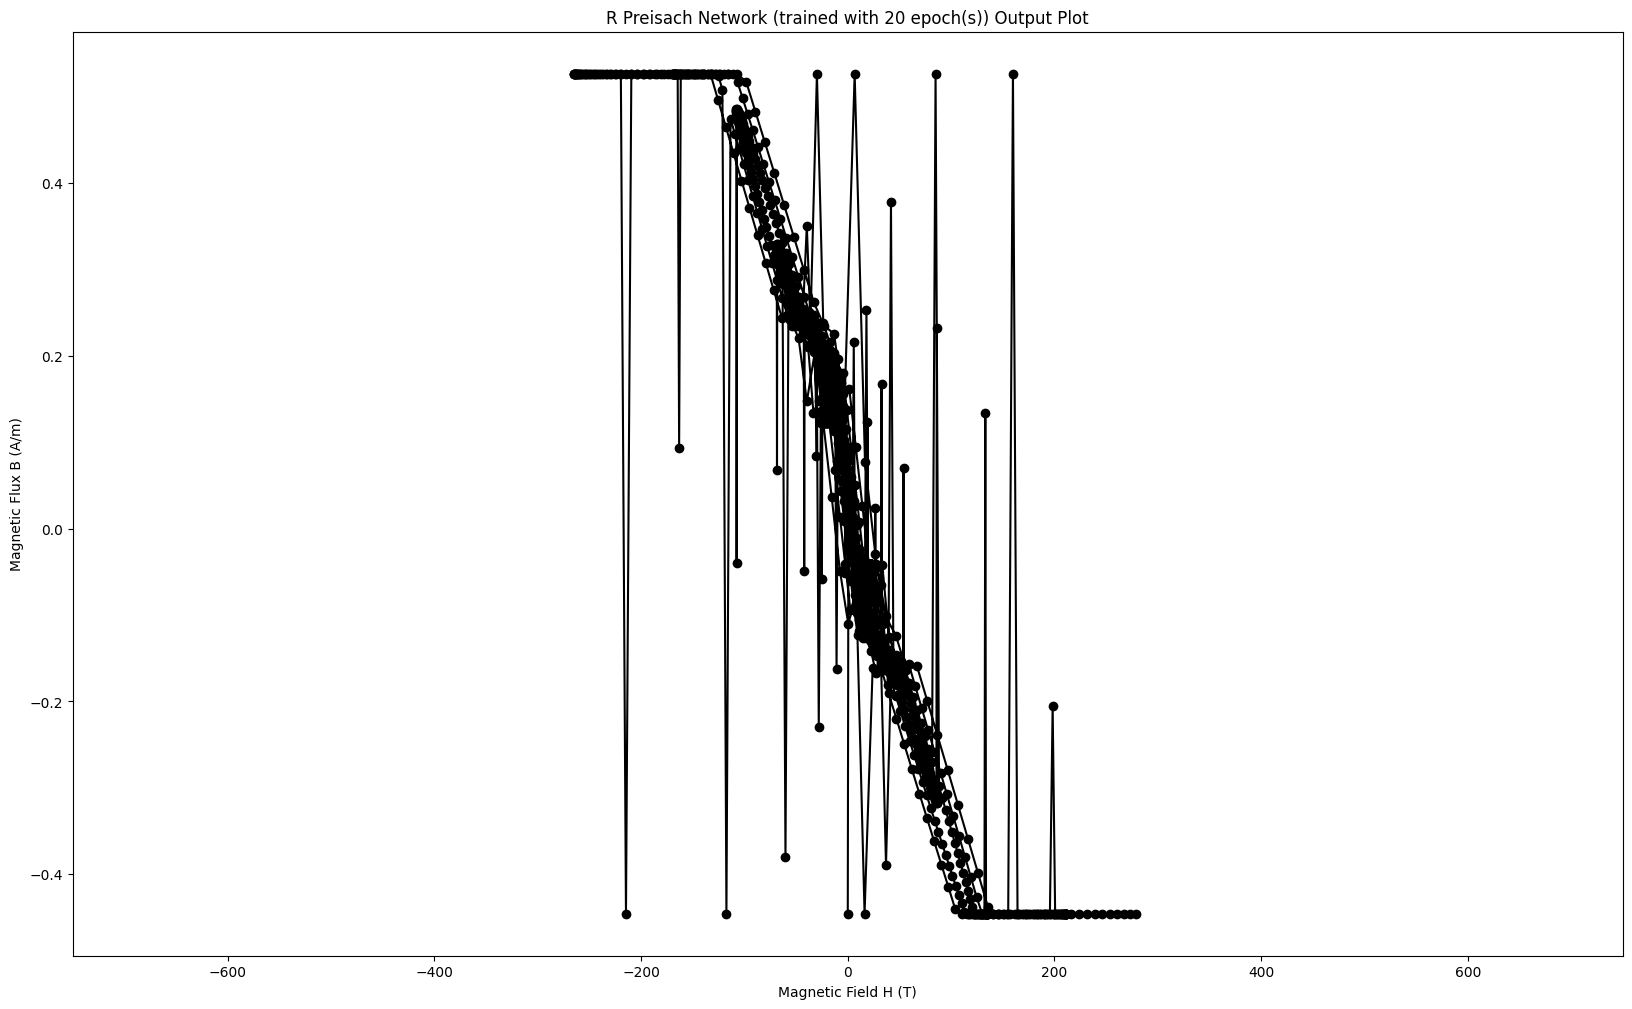

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 1)                   2         
                                                                 
 stop_operator_layer (Recurr  (32, 10)                 30        
 entPreisachLayer)                                               
                                                                 
 dense_1 (Dense)             (32, 1)                   11        
                                                                 
Total params: 43
Trainable params: 23
Non-trainable params: 20
_________________________________________________________________


In [7]:
# Evaluate and generate a plot of the RPNN
print("Output range of predicted loop should be bound between (-2, 2). Max should be something around 1.8")
rpnn_prediction = rpnn_model.predict(p_test_x[0:1152])
plot_predicted(p_test_x[0:1152], rpnn_prediction[0:1152], "R Preisach Network (trained with {} epoch(s))".format(n))
rpnn_model.summary()

## Feedforward Network

In [ ]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

In [ ]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [ ]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

In [ ]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")

## Preisach Network

In [ ]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(p_train_x, p_train_y, "preisach.model", n_epochs=20)

In [ ]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [ ]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(p_test_x)
mse = compute_mse(p_test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(p_test_x, p_test_y)

In [ ]:
# Plot Preisach output
plot_predicted(p_test_x, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)

In [ ]:
plot_predicted(test_next_h, rnn_prediction, "Recurrent LSTM network")